<a href="https://colab.research.google.com/github/19PA1A0497/Python-Basics/blob/master/multivariate_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the required packages

import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 
from sklearn import metrics



In [0]:
cri=pd.read_csv("ebola_2014_2016_clean.csv")
cri.head()


,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0
1,Nigeria,2014-08-29,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7.0
2,Sierra Leone,2014-08-29,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422.0
3,Liberia,2014-08-29,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694.0
4,Sierra Leone,2014-09-05,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491.0


In [0]:
cri.shape

(2485, 10)

In [0]:
cri.isna().any()

Country                                            False
Date                                               False
No. of suspected cases                              True
No. of probable cases                               True
No. of confirmed cases                              True
No. of confirmed, probable and suspected cases      True
No. of suspected deaths                             True
No. of probable deaths                              True
No. of confirmed deaths                             True
No. of confirmed, probable and suspected deaths    False
dtype: bool

In [0]:
cri=cri.fillna(method="ffill")

In [0]:
cri.isna().any()

Country                                            False
Date                                               False
No. of suspected cases                             False
No. of probable cases                              False
No. of confirmed cases                             False
No. of confirmed, probable and suspected cases     False
No. of suspected deaths                            False
No. of probable deaths                             False
No. of confirmed deaths                            False
No. of confirmed, probable and suspected deaths    False
dtype: bool

In [0]:
x=cri[['No. of suspected cases','No. of probable cases','No. of confirmed cases','No. of suspected deaths','No. of probable deaths','No. of confirmed deaths','No. of confirmed, probable and suspected deaths']].values
y=cri['No. of confirmed, probable and suspected cases'].values


In [0]:
x.shape

(2485, 7)

In [0]:
y.shape

(2485,)

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
model.intercept_

-15.905383059384349

In [0]:
model.coef_

array([ 0.50418702,  0.65256537,  0.82695116,  0.77260926, -2.44826891,
        0.21029081,  0.8060473 ])

In [0]:
predicted_Number =model.predict(X_test)
predicted_Number.shape

(497,)

In [0]:
X_test.shape

(497, 7)

In [0]:

Actual_predicted=pd.DataFrame({"Actual": y_test.flatten(), "Predicted": predicted_Number.flatten()})

In [0]:
Actual_predicted.head()

,Actual,Predicted
0,20.0,5.931400
1,1.0,-14.868141
2,4.0,-11.581240
3,1.0,-15.078432
4,3745.0,4331.073384


ValueError: ignored

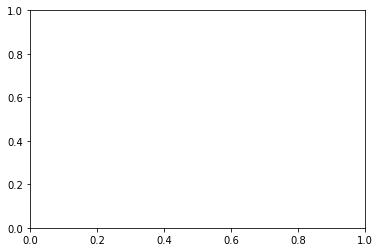

In [0]:
plt.scatter(X_test,y_test,color='red')
plt.plot(y_test,predicted_Number)